<a href="https://colab.research.google.com/github/ibeakanmaj/AI_in_Finance/blob/master/multivariateoncodelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import datetime

import matplotlib.pyplot as plt
mpl.style.use('seaborn')
!pip install ta
import ta

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Installation of requirments
# conda create --name tf python=3
# source activate tf
# pip install -r requirements.txt

%matplotlib inline
import functools
from sklearn.preprocessing import MinMaxScaler

###We need to import several things from Keras.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean

##See the versions of tensorflow, keras and pandas in use  This was developed using Python 3.6 (Anaconda) and package versions:

tf.__version__
tf.keras.__version__
pd.__version__

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=c334798cadd174f393e233e02f1b0b5dab2cae7c5f824a7ab7433dfd7b121940
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


'1.0.5'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My\ Drive/ml

# ## alternative code

# # from google.colab import drive
# # drive.mount('/gdrive')
# # %cd /gdrive


In [ ]:
# %cd /content/drive/My\ Drive/ml

In [ ]:
ls

drive/  EURUSD_M1_FULL.csv  sample_data/


In [7]:
date_columns = { 'Datetime' : ['<DATE>','<TIME>']}

dataset = pd.read_csv("/content/drive/My Drive/ml/EURUSD_M1_FULL.csv", sep = "\t", parse_dates=date_columns)

#dataset = pd.read_csv("EURUSD_M1_FULL.csv", sep = "\t", parse_dates=date_columns)

raw_dataset = dataset

dataset = dataset.drop(columns=['<VOL>', '<SPREAD>'])

dataset = dataset.iloc[3746666:3872266, 0:11 ]

dataset


,Datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
3746666,2020-02-18 20:36:00,1.08026,1.08029,1.08023,1.08027,17
3746667,2020-02-18 20:37:00,1.08026,1.08029,1.08024,1.08024,12
3746668,2020-02-18 20:38:00,1.08025,1.08026,1.08018,1.08020,20
3746669,2020-02-18 20:39:00,1.08017,1.08017,1.08014,1.08014,5
3746670,2020-02-18 20:40:00,1.08014,1.08018,1.08014,1.08018,8
...,...,...,...,...,...,...
3872261,2020-06-19 17:07:00,1.12238,1.12252,1.12231,1.12252,59
3872262,2020-06-19 17:08:00,1.12252,1.12277,1.12249,1.12260,54
3872263,2020-06-19 17:09:00,1.12260,1.12274,1.12251,1.12274,41
3872264,2020-06-19 17:10:00,1.12277,1.12287,1.12261,1.12283,47


In [8]:
# this is to add extra columns containing features crossed ( feature crossing)
dataset['Marketsize'] = dataset.apply(lambda row: row['<OPEN>'] - row['<CLOSE>'], axis=1)
dataset['Marketforce'] = dataset.apply(lambda row: row['<HIGH>'] - row['<LOW>'], axis=1)
dataset['Marketgravity'] = dataset.apply(lambda row: row['Marketforce'] * row['Marketsize'], axis=1)
dataset['Marketgravity1'] = dataset.apply(lambda row: row['Marketforce'] + row['Marketsize'], axis=1)
dataset['Marketmoment'] = dataset.apply(lambda row: row['Marketgravity'] * row['<TICKVOL>'], axis=1)
dataset['weekday'] = dataset['Datetime'].dt.dayofweek
df = dataset
df_raw = df
df

,Datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,Marketsize,Marketforce,Marketgravity,Marketgravity1,Marketmoment
3746666,2020-02-18 20:36:00,1.08026,1.08029,1.08023,1.08027,17,-0.00001,0.00006,-6.000000e-10,0.00005,-1.020000e-08
3746667,2020-02-18 20:37:00,1.08026,1.08029,1.08024,1.08024,12,0.00002,0.00005,1.000000e-09,0.00007,1.200000e-08
3746668,2020-02-18 20:38:00,1.08025,1.08026,1.08018,1.08020,20,0.00005,0.00008,4.000000e-09,0.00013,8.000000e-08
3746669,2020-02-18 20:39:00,1.08017,1.08017,1.08014,1.08014,5,0.00003,0.00003,9.000000e-10,0.00006,4.500000e-09
3746670,2020-02-18 20:40:00,1.08014,1.08018,1.08014,1.08018,8,-0.00004,0.00004,-1.600000e-09,0.00000,-1.280000e-08
...,...,...,...,...,...,...,...,...,...,...,...
3872261,2020-06-19 17:07:00,1.12238,1.12252,1.12231,1.12252,59,-0.00014,0.00021,-2.940000e-08,0.00007,-1.734600e-06
3872262,2020-06-19 17:08:00,1.12252,1.12277,1.12249,1.12260,54,-0.00008,0.00028,-2.240000e-08,0.00020,-1.209600e-06
3872263,2020-06-19 17:09:00,1.12260,1.12274,1.12251,1.12274,41,-0.00014,0.00023,-3.220000e-08,0.00009,-1.320200e-06
3872264,2020-06-19 17:10:00,1.12277,1.12287,1.12261,1.12283,47,-0.00006,0.00026,-1.560000e-08,0.00020,-7.332000e-07


In [9]:
#THIS IS TO SAVE THE DATAFRAME TO CSV FILE
df.to_csv(r'/content/drive/My Drive/ml/EURUSD_M1_WITH_FC.csv')

In [10]:
df2 = ta.add_all_ta_features(df, open="<OPEN>", high="<HIGH>", low="<LOW>", close="<CLOSE>", volume="<TICKVOL>")

/usr/local/lib/python3.6/dist-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [11]:
#THIS IS TO SAVE THE DATAFRAME TO CSV FILE
df2.to_csv(r'/content/drive/My Drive/ml/EURUSD_M1_WITH_TA.csv')

In [12]:
df = df2

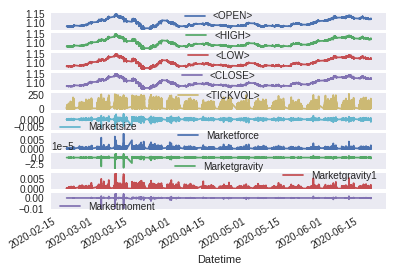

In [13]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)


TRAIN_SPLIT = 30000


features_considered = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', 'Marketsize', 'Marketforce', 'Marketgravity', 'Marketgravity1', 'Marketmoment']


features = df[features_considered]
features.index = df['Datetime']
features.head()

features.plot(subplots=True)


dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)


dataset = (dataset-data_mean)/data_std


In [14]:

past_history = 800
future_target = 60
STEP = 6

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)



print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target price to predict : {}'.format(y_train_multi[0].shape))


Single window of past history : (134, 10)

 Target price to predict : (60,)


In [16]:



def create_time_steps(length):
  return list(range(-length, 0))



def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt


def baseline(history):
  return np.mean(history)


BATCH_SIZE = 2560
BUFFER_SIZE = 1000


train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()


In [18]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()


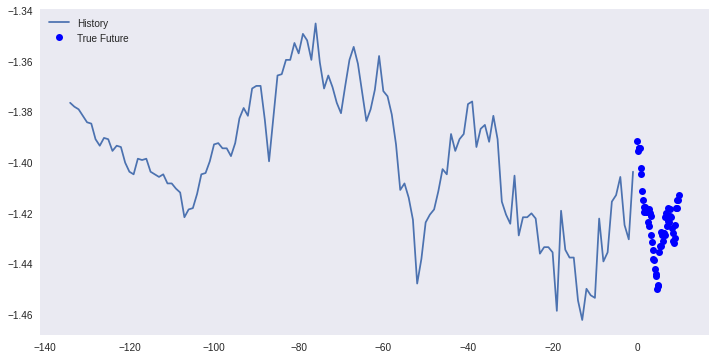

In [19]:


for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))


multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(60))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')



In [20]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)



(2560, 60)


In [21]:
EVALUATION_INTERVAL = 200
EPOCHS = 10


multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)


Epoch 1/10
200/200 [==============================] - 206s 1s/step - loss: 156980.4062 - val_loss: 0.7339
Epoch 2/10
200/200 [==============================] - 203s 1s/step - loss: 0.6117 - val_loss: 0.2348
Epoch 3/10
200/200 [==============================] - 206s 1s/step - loss: 0.1510 - val_loss: 0.1135
Epoch 4/10
200/200 [==============================] - 202s 1s/step - loss: 0.1157 - val_loss: 0.1069
Epoch 5/10
200/200 [==============================] - 204s 1s/step - loss: 0.1064 - val_loss: 0.0902
Epoch 6/10
200/200 [==============================] - 201s 1s/step - loss: 0.0993 - val_loss: 0.0709
Epoch 7/10
200/200 [==============================] - 202s 1s/step - loss: 0.0900 - val_loss: 0.0784
Epoch 8/10
200/200 [==============================] - 200s 998ms/step - loss: 0.0854 - val_loss: 0.0604
Epoch 9/10
200/200 [==============================] - 203s 1s/step - loss: 0.0794 - val_loss: 0.0575
Epoch 10/10
200/200 [==============================] - 203s 1s/step - loss: 0.0758 

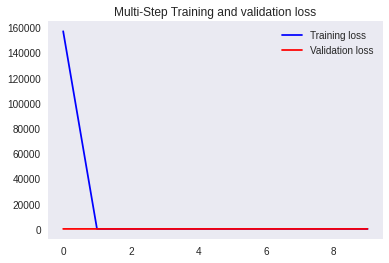

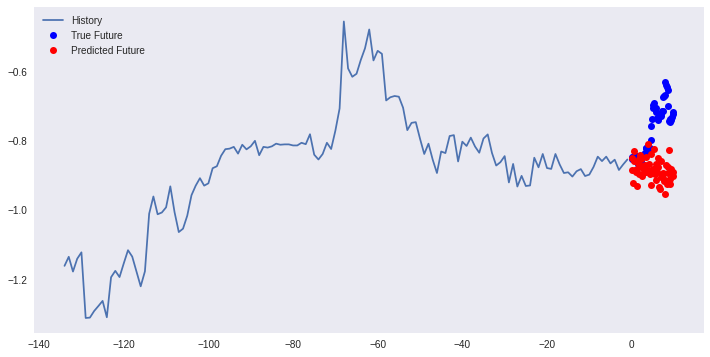

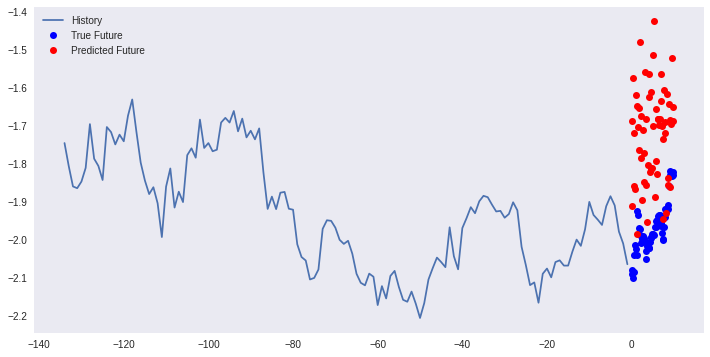

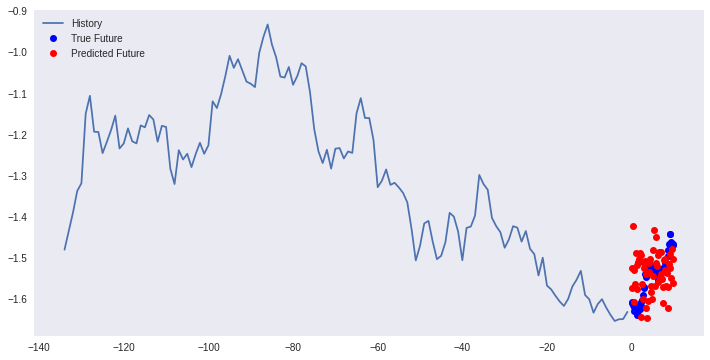

In [22]:

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()



plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')


for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])


                                                                    # This should be the end of multisingle

In [31]:
import tempfile



tmpdir = tempfile.mkdtemp()

mlmodel = multi_step_model

#mobilenet_save_path = os.path.join(tmpdir, "mobilenet/1/")
tf.saved_model.save(mlmodel, '/content/drive/My Drive/ml/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/ml/assets
